# Task 1

Fit a linear regression which describes tree age (Dataset dab.csv). Use numpy.linalg library to solve the equation beta @ $X^TX=X^Ty$. Present dataset and the model on a picture.

In [486]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Read Dataset and drop missing values.

In [487]:
# Load the dataset
df = pd.read_csv('/Users/filip/Documents/studia/mathematical-background/lab2/dab.csv')
df = df.dropna()

[12.72494172  0.88951049]


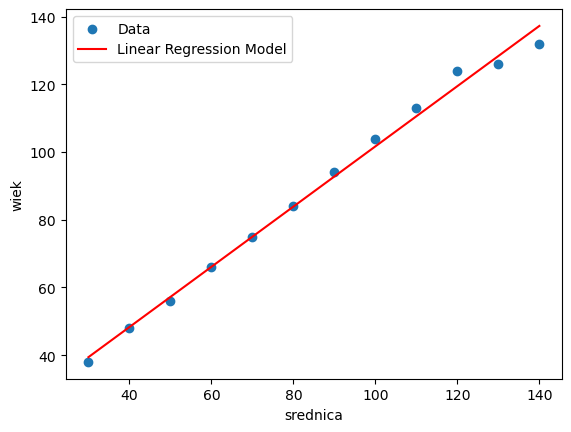

In [488]:
X = df.drop(columns=['wiek','srednica2']).values
y = df['wiek'].values

X = np.c_[(np.ones(X.shape[0]), X)]

beta = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta)

y_pred = X @ beta

plt.scatter(df['srednica'], df['wiek'], label='Data')
plt.plot(df['srednica'], y_pred, color='red', label='Linear Regression Model')
plt.xlabel('srednica')
plt.ylabel('wiek')
plt.legend()
plt.show()

# Task 2

Perform the above task using the function $\texttt{LinearRegression()}$ from $\verb+sklearn.linear_model+$.

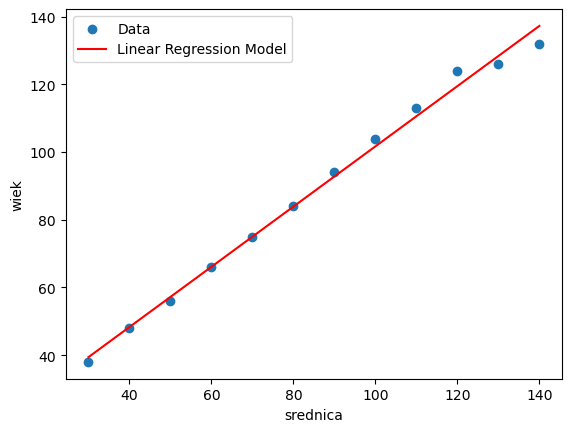

In [489]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

plt.scatter(df['srednica'], df['wiek'], label='Data')
plt.plot(df['srednica'], y_pred, color='red', label='Linear Regression Model')
plt.xlabel('srednica')
plt.ylabel('wiek')
plt.legend()
plt.show()

# Task 3

Create an artificial dataset ($x_i,y_i$, with $n=1000$) such that $y=x^2+e$, where $e$ comes from the standard normal distribution and $x\in[-1,1]$. 
Next, split the dataset into two parts (for $x<0$ and $x>0$) and train a linear regression $y=\beta_0 + \beta_1x$ on the first part. Please, read coefficients, $R^2$ and draw histogram of residuals.

Calculate the mean squared error (MSE) $\frac{\sum_{i=1}^{n/2}(\hat{y_i}-y_i)^2}{n/2}$ for the values fitted on the traning set($x<0$) and (next) on the test set($x>0$). Please compare this two values.

***Generate data sets***

In [490]:
X = [(np.random.random()*2 - 1) for _ in range(1000)]
Y = [x**2 + np.random.standard_normal() for x in X]

dataset = np.c_[X,Y]

train_set = dataset[dataset[:, 0] < 0]  
test_set = dataset[dataset[:, 0] >= 0]    

# print("Training set shape:", train_set.shape, train_set)
# print("Testing set shape:", test_set.shape, test_set)

***Fit to the train set and analyze it*** 

R^2: 0.09292680547633292 beta: [-0.23886500265924826, -1.1678843676680133]


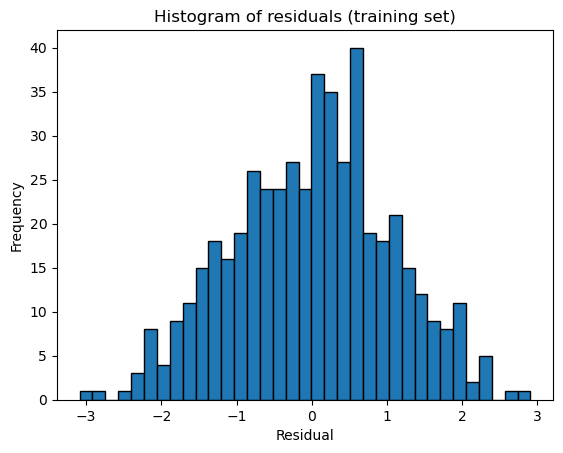

In [491]:
model = LinearRegression()

X_train = train_set[:,0].reshape(-1, 1)
y_train = train_set[:,1]

model.fit(X_train, y_train)

beta = [model.intercept_, model.coef_[0]]

R2= model.score(X_train, y_train)

print("R^2:", R2, "beta:", beta)

y_train_pred = model.predict(X_train)
residuals_train = y_train - y_train_pred

plt.hist(residuals_train, bins=35, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of residuals (training set)")
plt.show()


***Analyze the test set***

R^2: -1.751354793275579 beta: [-0.23886500265924826, -1.1678843676680133]


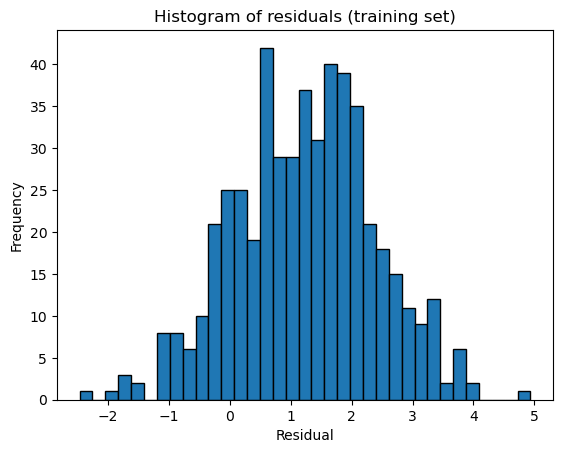

In [492]:
X_test = test_set[:,0].reshape(-1, 1)
y_test = test_set[:,1]

beta = [model.intercept_, model.coef_[0]]

R2= model.score(X_test, y_test)

print("R^2:", R2, "beta:", beta)

y_test_pred = model.predict(X_test)
residuals_test = y_test - y_test_pred

plt.hist(residuals_test, bins=35, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of residuals (training set)")
plt.show()



In [493]:
from scipy.stats import shapiro, anderson, kstest

shapiro_test = shapiro(residuals_train)
anderson_test = anderson(residuals_train)
kstest_test = kstest(residuals_train, 'norm', args=(np.mean(residuals_train), np.std(residuals_train)))

print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
print(f"Anderson-Darling test: Statistic={anderson_test.statistic}, Critical Values={anderson_test.critical_values}")
print(f"Kolmogorov-Smirnov test: Statistic={kstest_test.statistic}, p-value={kstest_test.pvalue}")

Shapiro-Wilk test: Statistic=0.9965052802874453, p-value=0.36178138178315866
Anderson-Darling test: Statistic=0.4720102593690285, Critical Values=[0.571 0.651 0.781 0.911 1.083]
Kolmogorov-Smirnov test: Statistic=0.030878554081779253, p-value=0.724076271915392


***Calculate the mean square error***

In [494]:
mean_square_error_train = np.mean((y_train - y_train_pred) ** 2)
mean_square_error_test = np.mean((y_test - y_test_pred) ** 2)

print(f"Training MSE = {mean_square_error_train}, Test MSE = {mean_square_error_test}")

Training MSE = 1.116643999991621, Test MSE = 2.8443241974564337


# Task 4

Repeat Task 3 for some better linear regression model (you can use a data transformation $\texttt{PolynomialFeatures}$). 

Again read $R^2$ and MSE for fitted values on both parts of data.



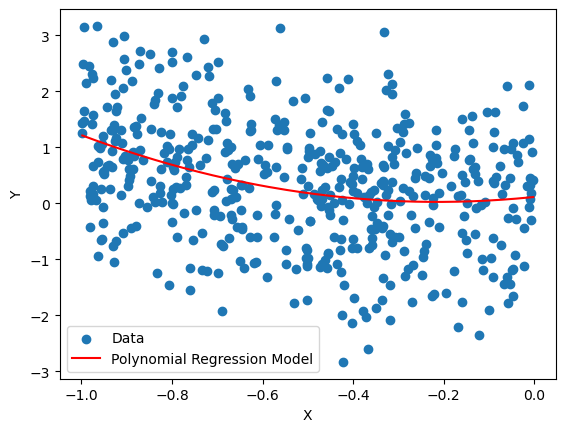

In [495]:
from sklearn.preprocessing import PolynomialFeatures

sorted_indices_X = np.argsort(X_train[:, 0])
X_train = X_train[sorted_indices_X]
y_train = y_train[sorted_indices_X]
X_test = X_test[sorted_indices_X]
y_test = y_test[sorted_indices_X]

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)

plt.scatter(X_train, y_train, label='Data')
plt.plot(X_train, y_train_pred, color='red', label='Polynomial Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [498]:
beta = [model.intercept_, model.coef_[1], model.coef_[2]]

R2= model.score(X_train_poly, y_train)

print("R^2:", R2, "beta:", beta)

beta = [model.intercept_, model.coef_[1], model.coef_[2]]

R2= model.score(X_test_poly, y_test)

print("R^2:", R2, "beta:", beta)

y_test_pred = model.predict(X_test_poly)

mean_square_error_train = np.mean((y_train - y_train_pred) ** 2)
mean_square_error_test = np.mean((y_test - y_test_pred) ** 2)

print(f"Training MSE = {mean_square_error_train}, Test MSE = {mean_square_error_test}")

R^2: 0.11077184725785238 beta: [0.11430498274832945, 0.8274735410388916, 1.9319130699031908]
R^2: -0.812011451165229 beta: [0.11430498274832945, 0.8274735410388916, 1.9319130699031908]
Training MSE = 1.094676027665641, Test MSE = 1.8728309384594384


# Task 5

In [497]:
from sklearn.model_selection import cross_val_score

Perform cross-validation cross_val_score for models from Task 1,2